In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.layers import Dense , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu,sigmoid,linear , softmax
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

In [2]:
(x_train , y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

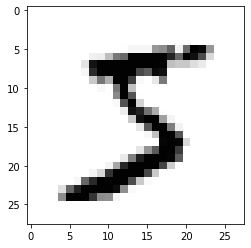

In [4]:
plt.imshow(x_train[0] , cmap="Greys")

In [5]:
tf.random.set_seed(1234) # for consistent results
model = tf.keras.models.Sequential([
    tf.keras.Input(x_train.shape[1:]),
    Flatten(),
    Dense(64 , activation="relu"),
    Dense(64 , activation="relu"),
    Dense(10 , activation="linear"),
    
])

In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
# y_2_train = tf.one_hot(y_train , 25) (found it wasn't useful)

In [9]:
history = model.fit(
    x_train,y_train,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0338A: 1s - loss:
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4184
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3344
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2768
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2390
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2011
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1687
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1407
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1272
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1188


<function matplotlib.pyplot.show(close=None, block=None)>

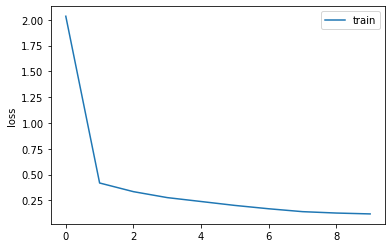

In [10]:
plt.plot(history.history['loss'],label='train')
plt.ylabel('loss')
plt.legend()
plt.show

In [18]:
probs = model.predict(x_test[:150])
preds = np.argmax(probs , axis=1)

2

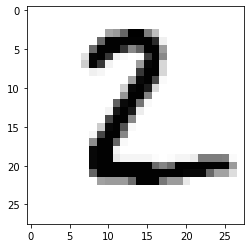

In [19]:
plt.imshow(x_test[1] , cmap="Greys")
preds[1]


1

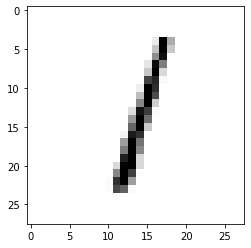

In [20]:
plt.imshow(x_test[2] , cmap="Greys")
preds[2]


6

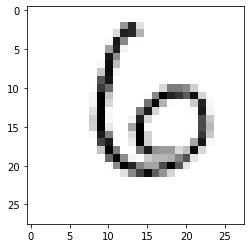

In [21]:
plt.imshow(x_test[100] , cmap="Greys")
preds[100]
